In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
from itertools import accumulate

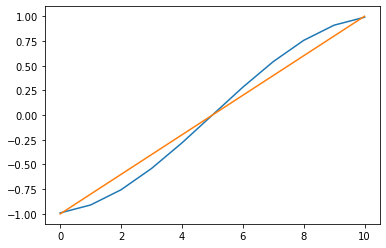

In [3]:

k=10
plt.plot(np.flip(np.cos(np.pi * (2*np.arange(1, k+2) - 1 ) / (2*(k+1)))))
plt.plot(np.linspace(-1, 1, k+1))

In [4]:
np.cos(np.pi*1/(2*(k+1)))

0.9898214418809327

In [5]:
x = np.array([1, 2, 3, 4, 5])
y = np.repeat(x[:, np.newaxis], 10, axis=1)

c = np.array([1, 2, 3])

print(np.array([1, 2, 3]))
np.polyval(np.flip(c), 2)

[1 2 3]


17

In [69]:
class Performative_Regression:

    def __init__(self, k, n , T, sigma=0.1):
        """
        k : polynomial degree
        """
        self.k = k
        self.n = n
        self.T = T
        self.sigma = sigma
        self.thetas = np.cos(np.pi * (2*np.arange(1, self.k+2) - 1 ) / (2*(self.k + 1)))

        self.f_hat_values = self.f_hat()

        self.V = self.vandermonde_matrix()
        self.V_det = self.vandermonde_determinant()
        
    def f(self, theta):
        """
        Input:
            theta: float, a number between -1 and 1
        Output:
            f(theta): float, a function of theta
        """

        fun = 3 + np.sin(theta - 2) + np.sin(theta)**2
        fun = 1 + theta * np.cos(5 * theta) + np.sin(theta - 2)**2 + theta * np.sin(theta + 3) * np.cos(theta + 3)
    
        return fun
    
    def f_hat(self):
        """ 
        Input:
            None
        Output:
            f_hat: array (k+1, ) with element i equal to f_hat(theta_i) where
            theta_i is the ith Chebyshev node
        """
        
        Y = (
            np.repeat(self.f(self.thetas)[:, np.newaxis], self.n, axis=1) +
            np.random.normal(0, self.sigma, (self.k+1, self.n))
        )

        f_hat = np.mean(Y, axis=1)

        return f_hat
    
    def vandermonde_matrix(self):
        """
        Input:
            None
        Output:
            V: array (k+1, k+1), the Vandermonde matrix with Chebyshev nodes
        """

        return np.vander(self.thetas, increasing=True)

    def vandermonde_determinant(self):
        """
        Input:
            None
        Output:
            det: float, the determinant of the Vandermonde matrix
        """

        det = (-1)**((self.k+1) * self.k / 2 ) * ((self.k+1)**(self.k+1) / 2**(self.k*self.k))**(1/2)
        
        return det   
    
    def true_objective_function(self, theta):
        """
        Input: 
            theta: float, a number between -1 and 1
        Output:
            f(theta)^2 - 2*theta*f(theta) + theta^2
            The true objective function, evaluated at theta
        """

        return self.f(theta)**2 - 2 * theta * self.f(theta) + theta**2
    
    def estimated_objective_function(self, theta):
        """
        Input:
            theta: float, a number between -1 and 1
        Output:
            p(theta)^2 - 2*theta*p(theta) + theta^2
            The estimated objective function evaluated at theta
        """

        p_theta = 0
        for i in range(k+1):
            prod = 1
            for j in range(k+1):
                if j != i:
                    prod = prod * (theta - self.thetas[j]) / (self.thetas[i] - self.thetas[j])

            p_theta = p_theta + prod * self.f_hat_values[i]

        return p_theta**2 - 2 * theta * p_theta + theta**2
    
    def plot_everything(self):
        
        t1 = np.linspace(-2, 2, 1000)
        t2 = np.linspace(-1, 1, 1000)

        plt.figure(figsize=(10, 7))
        plt.plot(t1, self.f(t1), label=r'$f(\theta)$')
        plt.plot(t1, self.true_objective_function(t1), 'k', label='true objective')
        plt.plot(t2, self.estimated_objective_function(t2), 'r--', label=f'estimated objective for k={self.k}')
        plt.fill_between(t2, 0, 25, color='C0', alpha=0.3)
        plt.xlabel(r"$\theta$")
        plt.ylim(0, 25)
        plt.legend(loc='upper right')
        plt.grid()
        plt.show()

    def plot_error(self):
        t = np.linspace(-1, 1, 1000)

        plt.figure(figsize=(10, 7))
        plt.plot(t, np.abs(self.true_objective_function(t) - self.estimated_objective_function(t)))
        plt.xlabel(r"$\theta$")
        plt.grid()
        plt.show()

    def plot_lagrange(self, j):

        t = np.linspace(-1, 1, 1000)

        prod = 1 
        for i in range(self.k+1):
            if i != j:
                prod = prod * (t - self.thetas[i]) / (self.thetas[j] - self.thetas[i])
        
        plt.figure(figsize=(10, 7))
        plt.plot(t, prod)
        plt.grid()
        plt.show()

    def max_value(self):
        prod = 1
        for i in range(1, self.k+1):
            prod = prod * (1 - self.thetas[i]) / (self.thetas[0] - self.thetas[i])

        return prod

    

In [70]:
k=7
pr = Performative_Regression(k=k, n=10000, T=100)

pr.max_value()

1.2691462984511077

In [67]:
pr.thetas

array([ 0.98078528,  0.83146961,  0.55557023,  0.19509032, -0.19509032,
       -0.55557023, -0.83146961, -0.98078528])

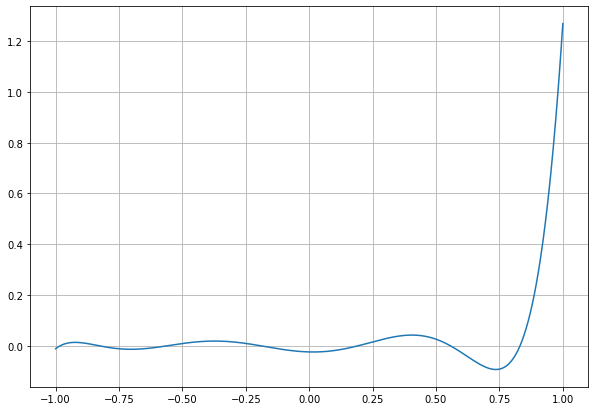

In [68]:
pr.plot_lagrange(0)

In [ ]:
k = 3
pr = Performative_Regression(k=k, n=10, T=500)
V = pr.vandermonde_matrix()
#sum_of_determinants(V, 4)

np.linalg.det(V)

1.2990381056766582

In [ ]:
v_inv_hopefully = np.zeros((k, k))
for i in range(k):
    for j in range(k):
        v_inv_hopefully[j][i] = (-1)**(i+j) * determinant_without_row_column(V, i, j) / np.linalg.det(V)

v_inv_hopefully #- np.linalg.inv(V)

array([[-1.98955933e-17,  8.42790857e-17,  1.00000000e+00,
        -8.42790857e-17,  1.98955933e-17],
       [ 3.24919696e-01, -1.37638192e+00, -1.22247272e-16,
         1.37638192e+00, -3.24919696e-01],
       [-3.41640786e-01,  2.34164079e+00, -4.00000000e+00,
         2.34164079e+00, -3.41640786e-01],
       [-9.40456404e-01,  1.52169043e+00,  1.35153260e-16,
        -1.52169043e+00,  9.40456404e-01],
       [ 9.88854382e-01, -2.58885438e+00,  3.20000000e+00,
        -2.58885438e+00,  9.88854382e-01]])